In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv") 

In [3]:
df_drop=df.drop(labels=['ID_code'],axis=1)
df_drop.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
X = df_drop.iloc[:,1:202].values
y = df_drop.iloc[:,0].values
X

array([[  8.9255,  -6.7863,  11.9081, ...,   8.5635,  12.7803,  -1.0914],
       [ 11.5006,  -4.1473,  13.8588, ...,   8.7889,  18.356 ,   1.9518],
       [  8.6093,  -2.7457,  12.0805, ...,   8.2675,  14.7222,   0.3965],
       ...,
       [ 11.2232,  -5.0518,  10.5127, ...,   8.7155,  13.8329,   4.1995],
       [  9.7148,  -8.6098,  13.6104, ...,  10.0342,  15.5289, -13.9001],
       [ 10.8762,  -5.7105,  12.1183, ...,   8.1857,  12.1284,   0.1385]])

In [5]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [6]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00000500e+00 -5.43701961e-04  6.57286666e-03 ... -7.52746424e-04
  -5.77572584e-03  3.84994710e-03]
 [-5.43701961e-04  1.00000500e+00  3.98051409e-03 ... -4.15698166e-03
  -4.86098030e-03  2.28713107e-03]
 [ 6.57286666e-03  3.98051409e-03  1.00000500e+00 ...  1.07819308e-03
  -8.77071574e-04  3.85485091e-03]
 ...
 [-7.52746424e-04 -4.15698166e-03  1.07819308e-03 ...  1.00000500e+00
   1.18252954e-03  4.99057990e-03]
 [-5.77572584e-03 -4.86098030e-03 -8.77071574e-04 ...  1.18252954e-03
   1.00000500e+00 -4.73058354e-03]
 [ 3.84994710e-03  2.28713107e-03  3.85485091e-03 ...  4.99057990e-03
  -4.73058354e-03  1.00000500e+00]]


In [ ]:
# plt.figure(figsize=(8,8))
# sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

# plt.title('Correlation between different features')

In [9]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.11359715 -0.03960425  0.10926765 ... -0.0254684   0.01306865
   0.00122   ]
 [ 0.10415697 -0.0362558   0.10124509 ... -0.04177453 -0.07605463
   0.02920876]
 [ 0.12145297 -0.10815139 -0.0665506  ...  0.01154148  0.0583501
   0.03584376]
 ...
 [-0.05731793  0.06940708  0.02551816 ...  0.03949949  0.11879054
  -0.0571167 ]
 [-0.10942072 -0.01430036  0.02245841 ...  0.05226997 -0.02193812
   0.00346688]
 [ 0.07395645 -0.07875135 -0.0242946  ... -0.06137017  0.02833766
   0.00052045]]

Eigenvalues 
[1.22262234 0.93814673 0.9398077  0.93929554 1.06053954 1.05972959
 1.05935073 1.0575937  1.05654297 1.0559005  1.05485824 1.05313637
 1.05257194 1.05111478 1.04999324 0.9426749  0.94346696 0.9455703
 0.94626034 0.94690907 1.04921006 1.04737953 1.04716789 1.04701259
 1.04545951 1.04476914 1.04299901 1.04385827 1.04365811 0.94954282
 0.94801412 0.94840852 1.04204096 1.0414636  1.03995595 1.04048843
 0.95043082 0.95206625 0.95128629 1.03890486 1.03860306 1.03851713
 0.95235229 0

In [10]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.2226223384117845
1.060539541817283
1.0597295876301611
1.0593507326915892
1.0575937047441824
1.0565429663904022
1.0559004955830973
1.0548582354716047
1.0531363740490627
1.0525719351516691
1.0511147796337834
1.0499932395007503
1.0492100640732402
1.0473795272963113
1.047167889014903
1.0470125858482986
1.0454595126776272
1.0447691378850497
1.0438582659781608
1.0436581067535133
1.0429990147390722
1.0420409582057963
1.041463596698286
1.0404884319639913
1.0399559506293894
1.0389048567444854
1.0386030613466952
1.0385171333112444
1.0374978755706965
1.0367024949180008
1.0365837699386797
1.0356655638959633
1.0347938269299675
1.0338478212189177
1.0332695071904836
1.0331998276116783
1.0324888607828404
1.0319585168650163
1.030941901226698
1.0306764933542623
1.0299024242426686
1.0290001551571097
1.0285229118049535
1.0282264360971058
1.0274120997986773
1.0268975253684787
1.0263706203661453
1.025810134724686
1.0255747154186041
1.0250323869414806
1.0238184359615188
1.0

In [11]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

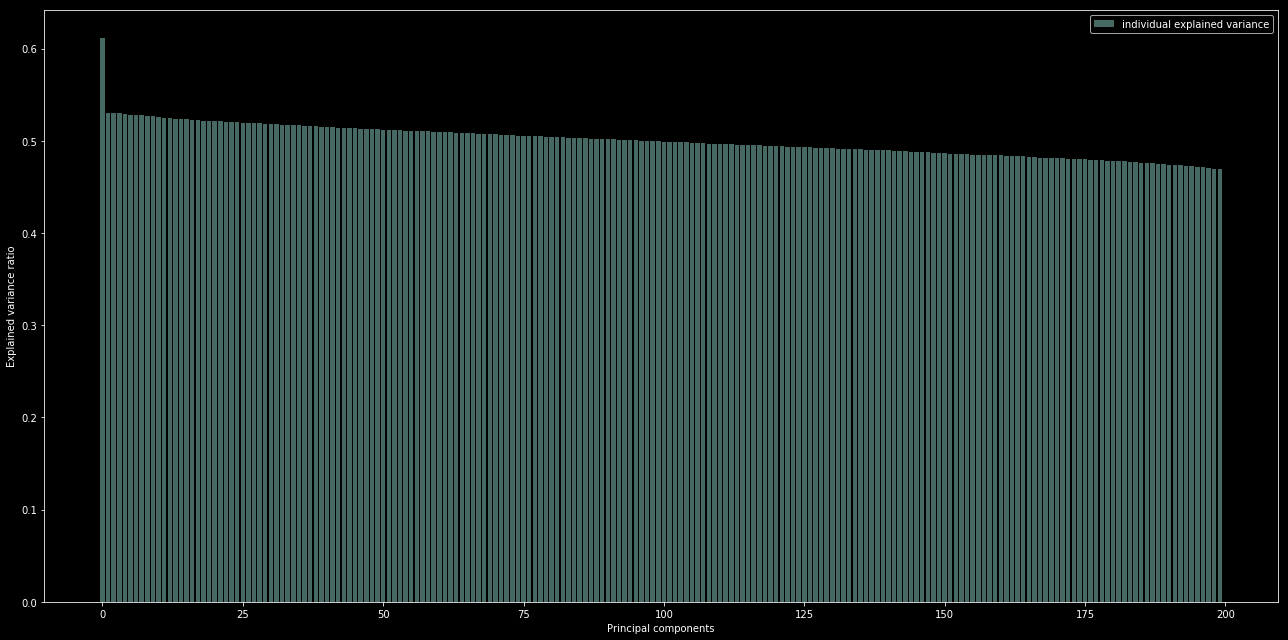

In [13]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(18, 9))

    plt.bar(range(200), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [1]:
# from sklearn.decomposition import PCA
# pca = PCA(.95).fit(X_std)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlim(0,200,1)
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')